## Neural Network in Tensorflow - basic example

### Sayantan Dutta

In [0]:
from __future__ import print_function, division
from builtins import range

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#create random training data
Nclass = 500
D = 2 #dimensionality of input
M = 3 #hidden layer size
K = 3 #number of classes

In [0]:
X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1,X2,X3]).astype(np.float32)

In [0]:
Y = np.array([0] * Nclass + [1] * Nclass + [2] * Nclass)

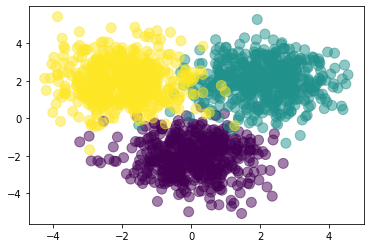

In [44]:
#lets see what it looks like 
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [0]:
N = len(Y)

In [0]:
#turn Y into an indicator matrix for training
T = np.zeros((N,K))
for i in range(N):
    T[i, Y[i]] = 1

In [0]:
#tensforflow variables are not the same as regular python variables
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2

In [0]:
tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

In [0]:
W1 = init_weights([D,M]) #create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M,K])
b2 = init_weights([K])

In [0]:
logits = forward(tfX, W1, b1, W2, b2)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= tfY, logits=logits)) #compute cost

In [0]:
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) #construct an optimizer #input parameter is the learning rate

In [0]:
predict_op = tf.argmax(logits,1) #input parameter is the axis on which to choose the max

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [55]:
for i in range(1000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX:X, tfY:T})
    if i%100 == 0:
        print("Accuracy:", np.mean(Y==pred))

Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.378
Accuracy: 0.7133333333333334
Accuracy: 0.9366666666666666
Accuracy: 0.9613333333333334
Accuracy: 0.9726666666666667
Accuracy: 0.9746666666666667
Accuracy: 0.9733333333333334
Accuracy: 0.974
